In [53]:
from pyspark.sql import SparkSession

# Initialize Spark Session with BigQuery Connector
spark = SparkSession.builder \
    .appName("BigQueryExample") \
    .config("spark.jars.packages", "com.google.cloud.spark:spark-bigquery-with-dependencies_2.12:0.31.1") \
    .getOrCreate()

# Specify BigQuery configuration
project_id = "lrf-bigdata"  # Replace with your GCP project ID
dataset = "divorcios"       # BigQuery dataset
table = "conjunto_datos"    # BigQuery table

# Define the BigQuery table path
bigquery_table = f"{project_id}.{dataset}.{table}"

# Load data from BigQuery
df = spark.read \
    .format("bigquery") \
    .option("table", bigquery_table) \
    .load()

df.createOrReplaceTempView("table")

In [54]:
df.toPandas().describe().T

,count,mean,std,min,25%,50%,75%,max
ent_regis,532036.0,16.007090,8.202013,1.0,9.0,15.0,23.0,32.0
mun_regis,532036.0,38.751900,48.137037,1.0,11.0,26.0,46.0,570.0
loc_regis,532036.0,39.448304,526.324085,1.0,1.0,1.0,1.0,7777.0
mun_mat,532036.0,43.253590,80.751041,1.0,10.0,27.0,48.0,999.0
local_mat,532036.0,236.505547,1416.823723,1.0,1.0,1.0,1.0,9999.0
dia_mat,532036.0,16.521078,9.812809,1.0,9.0,16.0,24.0,99.0
anio_mat,532036.0,2029.211739,434.834904,1950.0,1998.0,2008.0,2015.0,9999.0
dia_reg,532036.0,20.668500,22.126649,1.0,8.0,16.0,24.0,99.0
anio_reg,532036.0,2528.266038,1946.013043,1963.0,2021.0,2022.0,2023.0,9999.0
dia_sen,532036.0,15.844567,8.688205,1.0,8.0,16.0,23.0,31.0


In [3]:
#df.toPandas().info()

In [4]:
sql_result = spark.sql("SELECT * FROM table Limit 10")
sql_result.toPandas().shape

(10, 64)

In [5]:
sql_result = spark.sql("SELECT COUNT(*) FROM table")
sql_result.toPandas()

,count(1)
0,532036


In [6]:
sql_result = spark.sql("SELECT ent_mat, COUNT(*) FROM table GROUP BY ent_mat SORT BY COUNT(*) DESC")
sql_result.toPandas()

,ent_mat,count(1)
0,México,50752
1,Nuevo León,47685
2,Ciudad de México,35591
3,Guanajuato,31307
4,Sinaloa,26025
5,Coahuila de Zaragoza,25980
6,Chihuahua,25271
7,Jalisco,24480
8,Tamaulipas,24099
9,Michoacán de Ocampo,20635


In [7]:
sql_result = spark.sql("""
    SELECT anio_eje,
           COUNT(*) as cantidad
    FROM table
    GROUP BY anio_eje
    ORDER BY cantidad DESC
""")

sql_result.toPandas()

,anio_eje,cantidad
0,2022,164314
1,2023,162490
2,2021,142370
3,2020,62862


In [8]:
# -- 1. Tendencia general de divorcios por año
sql_result = spark.sql("""
SELECT anio_sen as year,
       COUNT(*) as total_divorcios,
       ROUND(((COUNT(*) * 1.0) / LAG(COUNT(*)) OVER (ORDER BY anio_sen) - 1) * 100, 2) as cambio_porcentual
FROM table
WHERE anio_sen BETWEEN 2020 AND 2023
GROUP BY anio_sen
ORDER BY anio_sen;
""")

sql_result.toPandas()

,year,total_divorcios,cambio_porcentual
0,2020,65809,None
1,2021,143943,118.73
2,2022,162684,13.02
3,2023,154771,-4.86


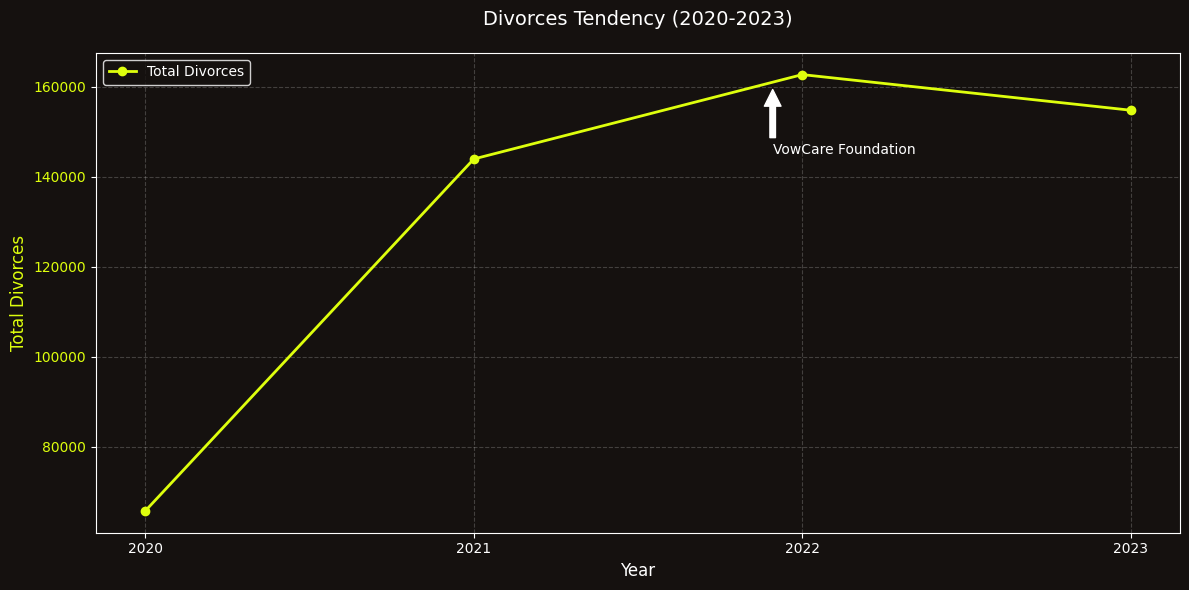

In [9]:
import matplotlib.pyplot as plt

# Usamos directamente sql_result que ya está en formato pandas
df = sql_result.toPandas()

# Set style and colors
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('#15110F')
ax.set_facecolor('#15110F')

# Plot total divorcios
ax.plot(df['year'], df['total_divorcios'], color='#DEFF0D', linewidth=2, marker='o', label='Total Divorces')
ax.set_xlabel('Year', color='#FFF', fontsize=12)
ax.set_ylabel('Total Divorces', color='#DEFF0D', fontsize=12)
ax.tick_params(axis='y', labelcolor='#DEFF0D')
ax.tick_params(axis='x', colors='#FFF')
ax.grid(True, linestyle='--', alpha=0.2)

# Add VowCare label
ax.annotate('VowCare Foundation',
           xy=(2021.91, 160000),  # Posición de la flecha
           xytext=(2021.91, 145000),  # Posición del texto
           color='#FFF',
           fontsize=10,
           arrowprops=dict(facecolor='#FFF', shrink=0.05))

# Customize X-axis
plt.xticks(df['year'])

# Add title
plt.title('Divorces Tendency (2020-2023)', color='#FFF', fontsize=14, pad=20)

# Add legend
ax.legend(facecolor='#15110F', edgecolor='#FFF', labelcolor='#FFF', loc='upper left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [10]:
# -- 2. Principales causas de divorcio
sql_result = spark.sql("""
SELECT causa,
       COUNT(*) as cantidad,
       ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (), 2) as porcentaje
FROM table
GROUP BY causa
ORDER BY cantidad DESC
LIMIT 10;
""")

sql_result.toPandas()

,causa,cantidad,porcentaje
0,Sin causa (incausado),350774,65.93
1,Mutuo consentimiento,173916,32.69
2,Separación del hogar conyugal por más de 1 año,2943,0.55
3,La separación por 2 años o más independienteme...,1237,0.23
4,Incompatibilidad de caracteres,1086,0.20
5,Abandono de hogar por más de 3 o 6 meses,824,0.15
6,No especificada,403,0.08
7,Si un cónyuge solicitó el divorcio por causa i...,244,0.05
8,Sevicia,184,0.03
9,Adulterio o infidelidad sexual,151,0.03


In [11]:
# -- 3. Duración promedio del matrimonio por nivel educativo
sql_result = spark.sql("""
SELECT escol_div1,
       ROUND(AVG(dura_soc), 2) as duracion_promedio_years,
       COUNT(*) as cantidad_divorcios
FROM table
GROUP BY escol_div1
ORDER BY duracion_promedio_years DESC;
""")

sql_result.toPandas()

,escol_div1,duracion_promedio_years,cantidad_divorcios
0,4 a 5 años de primaria,31.81,2723
1,1 a 3 años de primaria,30.74,3427
2,Primaria completa,28.81,31428
3,No especificada,26.39,143103
4,Otra,26.29,4772
5,Sin escolaridad,25.99,5507
6,Secundaria o equivalente,22.18,105304
7,Preparatoria o equivalente,20.46,111007
8,Superior,19.73,97337
9,Carrera técnica,17.83,27428


In [41]:
sql_result = spark.sql("""
SELECT
    education.level as Studies,
    ROUND(AVG(dura_soc), 2) as avg_duration,
    COUNT(*) as cantidad_divorcios
FROM (
    SELECT escol_div1 as level, dura_soc FROM table
    UNION ALL
    SELECT escol_div2 as level, dura_soc FROM table
) education
GROUP BY education.level
ORDER BY avg_duration DESC;
""")

sql_result.toPandas()

,Studies,avg_duration,cantidad_divorcios
0,4 a 5 años de primaria,32.16,4944
1,1 a 3 años de primaria,30.83,6108
2,Primaria completa,28.86,59457
3,Sin escolaridad,26.00,10294
4,No especificada,25.56,326870
5,Otra,24.66,10554
6,Secundaria o equivalente,22.37,200220
7,Preparatoria o equivalente,20.50,211143
8,Superior,19.97,181648
9,Carrera técnica,17.74,52834


In [12]:
# -- 3. Duración promedio del matrimonio por nivel educativo
sql_result = spark.sql("""
SELECT
    d.escol_div1,
    d.escol_div2,
    COUNT(*) as cantidad_divorcios,
    ROUND(AVG(dura_soc), 2) as duracion_promedio_matrimonio
FROM table d
GROUP BY d.escol_div1, d.escol_div2
ORDER BY cantidad_divorcios DESC
LIMIT 10;
""")

sql_result.toPandas()

,escol_div1,escol_div2,cantidad_divorcios,duracion_promedio_matrimonio
0,No especificada,No especificada,135504,26.84
1,Superior,Superior,59462,20.15
2,Preparatoria o equivalente,Preparatoria o equivalente,58910,20.82
3,Secundaria o equivalente,Secundaria o equivalente,55202,22.78
4,Preparatoria o equivalente,Secundaria o equivalente,18812,21.27
5,Secundaria o equivalente,Preparatoria o equivalente,16518,20.63
6,Secundaria o equivalente,No especificada,15241,19.65
7,Superior,Preparatoria o equivalente,14071,20.56
8,Primaria completa,Primaria completa,12816,32.04
9,Preparatoria o equivalente,No especificada,12002,17.42


In [13]:

sql_result = spark.sql("""
SELECT
    d.escol_div1,
    d.escol_div2,
    COUNT(*) as cantidad_divorcios,
    ROUND(AVG(dura_soc), 2) as duracion_promedio_matrimonio
FROM table d
GROUP BY d.escol_div1, d.escol_div2
ORDER BY cantidad_divorcios DESC
LIMIT 10;
""")

sql_result.toPandas()

,escol_div1,escol_div2,cantidad_divorcios,duracion_promedio_matrimonio
0,No especificada,No especificada,135504,26.84
1,Superior,Superior,59462,20.15
2,Preparatoria o equivalente,Preparatoria o equivalente,58910,20.82
3,Secundaria o equivalente,Secundaria o equivalente,55202,22.78
4,Preparatoria o equivalente,Secundaria o equivalente,18812,21.27
5,Secundaria o equivalente,Preparatoria o equivalente,16518,20.63
6,Secundaria o equivalente,No especificada,15241,19.65
7,Superior,Preparatoria o equivalente,14071,20.56
8,Primaria completa,Primaria completa,12816,32.04
9,Preparatoria o equivalente,No especificada,12002,17.42


In [14]:
# -- 4. Edad promedio al divorciarse por género
sql_result = spark.sql("""
SELECT
    'Primer divorciante' as divorciante,
    ROUND(AVG(CASE WHEN sexo_div1 = 'Hombre' AND edad_div1 < 150 THEN edad_div1 END), 2) as edad_promedio_hombres,
    ROUND(AVG(CASE WHEN sexo_div1 = 'Mujer' AND edad_div1 < 150 THEN edad_div1 END), 2) as edad_promedio_mujeres
FROM table
UNION ALL
SELECT
    'Segundo divorciante',
    ROUND(AVG(CASE WHEN sexo_div2 = 'Hombre' AND edad_div2 < 150 THEN edad_div2 END), 2),
    ROUND(AVG(CASE WHEN sexo_div2 = 'Mujer' AND edad_div2 < 150 THEN edad_div2 END), 2)
FROM table;
""")

sql_result.toPandas()

,divorciante,edad_promedio_hombres,edad_promedio_mujeres
0,Primer divorciante,43.17,39.64
1,Segundo divorciante,41.85,40.55


In [15]:
sql_result = spark.sql("""
SELECT
    'Mujeres' as genero,
    ROUND(AVG(
        CASE WHEN (sexo_div1 = 'Mujer' AND edad_div1 < 150) OR
                  (sexo_div2 = 'Mujer' AND edad_div2 < 150)
        THEN
            CASE
                WHEN sexo_div1 = 'Mujer' THEN edad_div1
                ELSE edad_div2
            END
        END
    ), 2) as edad_promedio
FROM table
UNION ALL
SELECT
    'Hombres',
    ROUND(AVG(
        CASE WHEN (sexo_div1 = 'Hombre' AND edad_div1 < 150) OR
                  (sexo_div2 = 'Hombre' AND edad_div2 < 150)
        THEN
            CASE
                WHEN sexo_div1 = 'Hombre' THEN edad_div1
                ELSE edad_div2
            END
        END
    ), 2)
FROM table;
""")

sql_result.toPandas()

,genero,edad_promedio
0,Mujeres,40.18
1,Hombres,42.66


In [16]:
sql_result = spark.sql("""
SELECT
    'Mujeres' as genero,
    ROUND(AVG(
        CASE WHEN (sexo_div1 = 'Mujer' AND edad_mdiv1 < 150) OR
                  (sexo_div2 = 'Mujer' AND edad_mdiv2 < 150)
        THEN
            CASE
                WHEN sexo_div1 = 'Mujer' THEN edad_mdiv1
                ELSE edad_mdiv2
            END
        END
    ), 2) as edad_promedio
FROM table
UNION ALL
SELECT
    'Hombres',
    ROUND(AVG(
        CASE WHEN (sexo_div1 = 'Hombre' AND edad_mdiv1 < 150) OR
                  (sexo_div2 = 'Hombre' AND edad_mdiv2 < 150)
        THEN
            CASE
                WHEN sexo_div1 = 'Hombre' THEN edad_mdiv1
                ELSE edad_mdiv2
            END
        END
    ), 2)
FROM table;
""")

sql_result.toPandas()

,genero,edad_promedio
0,Mujeres,36.55
1,Hombres,39.19


In [17]:
# -- 5. Impacto en los hijos
sql_result = spark.sql("""
SELECT
    CASE
        WHEN hijos = 0 THEN 'Sin hijos'
        WHEN hijos = 1 THEN '1 hijo'
        WHEN hijos = 2 THEN '2 hijos'
        WHEN hijos > 2 THEN 'Más de 2 hijos'
    END as categoria_hijos,
    COUNT(*) as cantidad_divorcios,
    ROUND(AVG(dura_soc), 2) as duracion_promedio_matrimonio
FROM table
GROUP BY categoria_hijos
ORDER BY cantidad_divorcios DESC;
""")

sql_result.toPandas()

,categoria_hijos,cantidad_divorcios,duracion_promedio_matrimonio
0,Más de 2 hijos,158478,38.82
1,2 hijos,136639,17.64
2,1 hijo,118769,13.43
3,Sin hijos,118150,16.94


In [18]:
# -- 6. Análisis de factores económicos
sql_result = spark.sql("""
SELECT
    d.dedic_div1,
    d.dedic_div2,
    COUNT(*) as cantidad_divorcios,
    ROUND(AVG(dura_soc), 2) as duracion_promedio_matrimonio
FROM table d
GROUP BY d.dedic_div1, d.dedic_div2
ORDER BY cantidad_divorcios DESC
LIMIT 7;
""")

sql_result.toPandas()

,dedic_div1,dedic_div2,cantidad_divorcios,duracion_promedio_matrimonio
0,Trabaja,Trabaja,238695,20.71
1,No especificada,No especificada,101012,29.26
2,Trabaja,Al hogar,56624,26.31
3,Trabaja,No especificada,43931,19.00
4,Al hogar,Trabaja,38554,18.20
5,No especificada,Trabaja,9862,17.20
6,Al hogar,No especificada,8536,20.44


In [19]:
sql_result = spark.sql("""

SELECT
    CASE
        WHEN d.dedic_div1 = 'Trabaja' AND d.dedic_div2 = 'Al hogar' OR
             d.dedic_div1 = 'Al hogar' AND d.dedic_div2 = 'Trabaja'
        THEN 'One Works, One at Home'
        WHEN d.dedic_div1 = 'Trabaja' AND d.dedic_div2 = 'Trabaja'
        THEN 'Both Work'
        WHEN d.dedic_div1 = 'No especificada' AND d.dedic_div2 = 'No especificada'
        THEN 'Both Not Specified'
        WHEN (d.dedic_div1 = 'Trabaja' AND d.dedic_div2 = 'No especificada') OR
             (d.dedic_div1 = 'No especificada' AND d.dedic_div2 = 'Trabaja')
        THEN 'One Works, One Not Specified'
        WHEN (d.dedic_div1 = 'Al hogar' AND d.dedic_div2 = 'No especificada') OR
             (d.dedic_div1 = 'No especificada' AND d.dedic_div2 = 'Al hogar')
        THEN 'One at Home, One Not Specified'
    END as employment_status,
    COUNT(*) as cantidad_divorcios,
    ROUND(AVG(dura_soc), 2) as duracion_promedio_matrimonio
FROM table d
GROUP BY
    CASE
        WHEN d.dedic_div1 = 'Trabaja' AND d.dedic_div2 = 'Al hogar' OR
             d.dedic_div1 = 'Al hogar' AND d.dedic_div2 = 'Trabaja'
        THEN 'One Works, One at Home'
        WHEN d.dedic_div1 = 'Trabaja' AND d.dedic_div2 = 'Trabaja'
        THEN 'Both Work'
        WHEN d.dedic_div1 = 'No especificada' AND d.dedic_div2 = 'No especificada'
        THEN 'Both Not Specified'
        WHEN (d.dedic_div1 = 'Trabaja' AND d.dedic_div2 = 'No especificada') OR
             (d.dedic_div1 = 'No especificada' AND d.dedic_div2 = 'Trabaja')
        THEN 'One Works, One Not Specified'
        WHEN (d.dedic_div1 = 'Al hogar' AND d.dedic_div2 = 'No especificada') OR
             (d.dedic_div1 = 'No especificada' AND d.dedic_div2 = 'Al hogar')
        THEN 'One at Home, One Not Specified'
    END
ORDER BY cantidad_divorcios DESC;
""")

sql_result.toPandas()

,employment_status,cantidad_divorcios,duracion_promedio_matrimonio
0,Both Work,238695,20.71
1,Both Not Specified,101012,29.26
2,"One Works, One at Home",95178,23.02
3,"One Works, One Not Specified",53793,18.67
4,None,31270,26.04
5,"One at Home, One Not Specified",12088,20.66


In [20]:
sql_result = spark.sql("""
WITH empleo_sexo AS (
    SELECT
        'Primer divorciante' as divorciante,
        sexo_div1 as sexo,
        dedic_div1 as empleo,
        COUNT(*) as cantidad
    FROM table
    GROUP BY sexo_div1, dedic_div1

    UNION ALL

    SELECT
        'Segundo divorciante' as divorciante,
        sexo_div2 as sexo,
        dedic_div2 as empleo,
        COUNT(*) as cantidad
    FROM table
    GROUP BY sexo_div2, dedic_div2
),
totales AS (
    SELECT
        sexo,
        SUM(cantidad) as total_sexo
    FROM empleo_sexo
    WHERE sexo IN ('Hombre', 'Mujer')
        AND empleo IS NOT NULL
    GROUP BY sexo
)
SELECT
    e.sexo,
    e.empleo,
    SUM(e.cantidad) as total,
    ROUND(100.0 * SUM(e.cantidad) / MAX(t.total_sexo), 2) as porcentaje
FROM empleo_sexo e
JOIN totales t ON e.sexo = t.sexo
WHERE e.sexo IN ('Hombre', 'Mujer')
    AND e.empleo IS NOT NULL
GROUP BY e.sexo, e.empleo
ORDER BY e.sexo, porcentaje DESC;
""")

# Convertir a pandas
df_resultado = sql_result.toPandas()
df_resultado

,sexo,empleo,total,porcentaje
0,Hombre,Trabaja,368420,69.31
1,Hombre,No especificada,138095,25.98
2,Hombre,Pensionado o jubilado,10519,1.98
3,Hombre,Otra (no trabaja),5471,1.03
4,Hombre,Busca trabajo,5353,1.01
5,Hombre,Al hogar,2692,0.51
6,Hombre,Estudiante,610,0.11
7,Hombre,Incapacitado permanentemente para trabajar,294,0.06
8,Hombre,Rentista,106,0.02
9,Mujer,Trabaja,273022,51.27


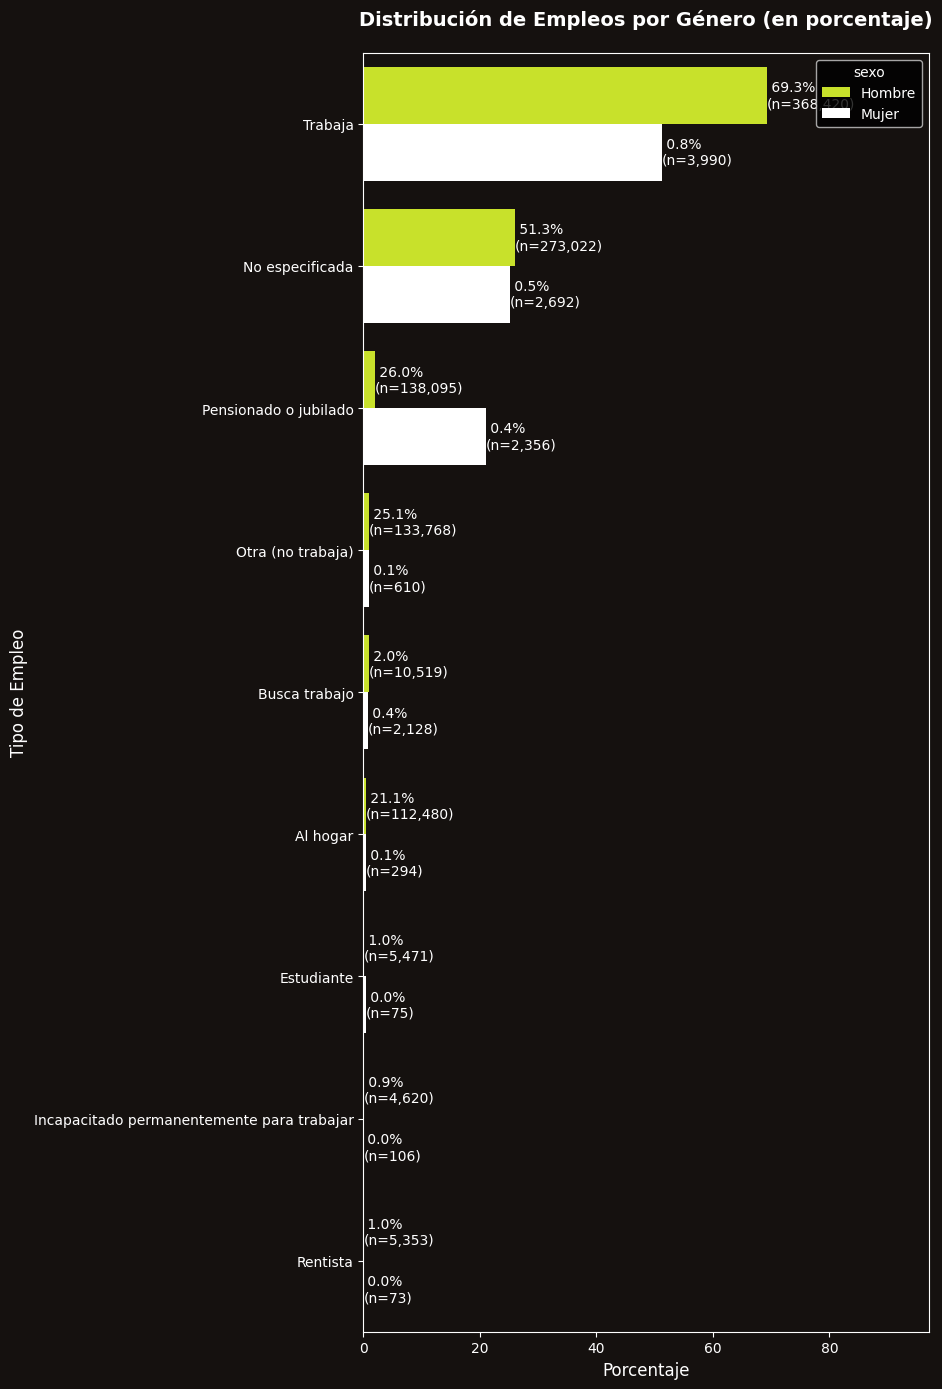

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recrear el DataFrame con los datos corregidos según la imagen
data = {
    'empleo': [
        'Trabaja', 'Trabaja',
        'No especificada', 'No especificada',
        'Pensionado o jubilado', 'Pensionado o jubilado',
        'Otra (no trabaja)', 'Otra (no trabaja)',
        'Busca trabajo', 'Busca trabajo',
        'Al hogar', 'Al hogar',
        'Estudiante', 'Estudiante',
        'Incapacitado permanentemente para trabajar', 'Incapacitado permanentemente para trabajar',
        'Rentista', 'Rentista'
    ],
    'sexo': ['Hombre', 'Mujer'] * 9,
    'porcentaje': [
        69.3, 51.3,  # Trabaja
        26.0, 25.1,  # No especificada
        2.0, 21.1,   # Pensionado o jubilado
        1.0, 0.9,    # Otra (no trabaja)
        1.0, 0.8,    # Busca trabajo
        0.5, 0.4,    # Al hogar
        0.1, 0.4,    # Estudiante
        0.1, 0.0,    # Incapacitado
        0.0, 0.0     # Rentista
    ],
    'total': [
        368420, 273022,    # Trabaja
        138095, 133768,    # No especificada
        10519, 112480,     # Pensionado o jubilado
        5471, 4620,        # Otra (no trabaja)
        5353, 3990,        # Busca trabajo
        2692, 2356,        # Al hogar
        610, 2128,         # Estudiante
        294, 75,           # Incapacitado
        106, 73            # Rentista
    ]
}

df_resultado = pd.DataFrame(data)

# Asegurarnos de que la columna porcentaje sea float
df_resultado['porcentaje'] = df_resultado['porcentaje'].astype(float)

# Configurar el estilo
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 14))
fig.patch.set_facecolor('#15110F')
ax.set_facecolor('#15110F')

# Crear el gráfico de barras agrupadas horizontal
barplot = sns.barplot(
    data=df_resultado,
    y='empleo',
    x='porcentaje',
    hue='sexo',
    palette=['#DEFF0D', '#FFFFFF'],
    orient='h'
)

# Mover la leyenda a la esquina superior derecha dentro del gráfico
plt.legend(title='sexo', loc='upper right', bbox_to_anchor=(1, 1))

# Añadir etiquetas con los valores
for idx, container in enumerate(barplot.containers):
    for i, bar in enumerate(container):
        width = bar.get_width()
        porcentaje = df_resultado['porcentaje'].iloc[i + idx * len(container)]
        total = df_resultado['total'].iloc[i + idx * len(container)]

        barplot.text(
            width,
            bar.get_y() + bar.get_height()/2,
            f' {porcentaje:.1f}%\n(n={total:,.0f})',
            ha='left',
            va='center',
            color='white'
        )

# Personalizar el gráfico
plt.title('Distribución de Empleos por Género (en porcentaje)', pad=20, size=14, weight='bold')
plt.ylabel('Tipo de Empleo', size=12)
plt.xlabel('Porcentaje', size=12)

# Ajustar los márgenes
plt.tight_layout()

# Ajustar el rango del eje x para dar espacio a las etiquetas
plt.xlim(0, max(df_resultado['porcentaje'].astype(float)) * 1.4)

plt.show()

In [22]:
# -- 7. Quién inicia el proceso de divorcio
sql_result = spark.sql("""
SELECT
    ini_juic,
    COUNT(*) as cantidad,
    ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (), 2) as porcentaje
FROM table
GROUP BY ini_juic
ORDER BY cantidad DESC;
""")

sql_result.toPandas()

,ini_juic,cantidad,porcentaje
0,Divorciante 1,284180,53.41
1,Ambos,210688,39.60
2,Divorciante 2,37168,6.99


In [23]:
sql_result = spark.sql("""
SELECT
    CASE
        WHEN ini_juic = 'Divorciante 1' AND sexo_div1 = 'Hombre' THEN 'Divorciante 1 - Hombre'
        WHEN ini_juic = 'Divorciante 1' AND sexo_div1 = 'Mujer' THEN 'Divorciante 1 - Mujer'
        WHEN ini_juic = 'Ambos' THEN 'Ambos cónyuges'
        WHEN ini_juic = 'Divorciante 2' AND sexo_div2 = 'Hombre' THEN 'Divorciante 2 - Hombre'
        WHEN ini_juic = 'Divorciante 2' AND sexo_div2 = 'Mujer' THEN 'Divorciante 2 - Mujer'
    END as iniciador_genero,
    COUNT(*) as cantidad,
    ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (), 2) as porcentaje,
    ROUND(AVG(dura_soc), 2) as duracion_promedio_matrimonio,
    ROUND(AVG(CASE
        WHEN ini_juic = 'Divorciante 1' THEN edad_div1
        WHEN ini_juic = 'Divorciante 2' THEN edad_div2
        ELSE NULL
    END), 2) as edad_promedio_iniciador
FROM table
WHERE ini_juic IN ('Divorciante 1', 'Ambos', 'Divorciante 2')  -- Solo consideramos casos válidos
GROUP BY
    CASE
        WHEN ini_juic = 'Divorciante 1' AND sexo_div1 = 'Hombre' THEN 'Divorciante 1 - Hombre'
        WHEN ini_juic = 'Divorciante 1' AND sexo_div1 = 'Mujer' THEN 'Divorciante 1 - Mujer'
        WHEN ini_juic = 'Ambos' THEN 'Ambos cónyuges'
        WHEN ini_juic = 'Divorciante 2' AND sexo_div2 = 'Hombre' THEN 'Divorciante 2 - Hombre'
        WHEN ini_juic = 'Divorciante 2' AND sexo_div2 = 'Mujer' THEN 'Divorciante 2 - Mujer'
    END
ORDER BY cantidad DESC;
""")

sql_result.toPandas()

,iniciador_genero,cantidad,porcentaje,duracion_promedio_matrimonio,edad_promedio_iniciador
0,Ambos cónyuges,210688,39.60,29.65,NaN
1,Divorciante 1 - Mujer,144010,27.07,17.69,77.94
2,Divorciante 1 - Hombre,140170,26.35,19.42,104.57
3,Divorciante 2 - Mujer,30569,5.75,17.35,107.83
4,Divorciante 2 - Hombre,6599,1.24,17.13,70.89


In [24]:
sql_result = spark.sql("""
SELECT
    CASE
        WHEN ini_juic = 'Ambos' THEN 'Ambos'
        WHEN ini_juic = 'Divorciante 1' AND sexo_div1 = 'Hombre' THEN 'Hombre'
        WHEN ini_juic = 'Divorciante 1' AND sexo_div1 = 'Mujer' THEN 'Mujer'
        WHEN ini_juic = 'Divorciante 2' AND sexo_div2 = 'Hombre' THEN 'Hombre'
        WHEN ini_juic = 'Divorciante 2' AND sexo_div2 = 'Mujer' THEN 'Mujer'
    END as iniciador,
    COUNT(*) as cantidad,
    ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (), 2) as porcentaje,
    ROUND(AVG(dura_soc), 2) as duracion_promedio_matrimonio
FROM table
WHERE ini_juic IN ('Divorciante 1', 'Ambos', 'Divorciante 2')
GROUP BY
    CASE
        WHEN ini_juic = 'Ambos' THEN 'Ambos'
        WHEN ini_juic = 'Divorciante 1' AND sexo_div1 = 'Hombre' THEN 'Hombre'
        WHEN ini_juic = 'Divorciante 1' AND sexo_div1 = 'Mujer' THEN 'Mujer'
        WHEN ini_juic = 'Divorciante 2' AND sexo_div2 = 'Hombre' THEN 'Hombre'
        WHEN ini_juic = 'Divorciante 2' AND sexo_div2 = 'Mujer' THEN 'Mujer'
    END
ORDER BY cantidad DESC;
""")

sql_result.toPandas()

,iniciador,cantidad,porcentaje,duracion_promedio_matrimonio
0,Ambos,210688,39.60,29.65
1,Mujer,174579,32.81,17.63
2,Hombre,146769,27.59,19.32


In [25]:
sql_result = spark.sql("""
SELECT
    ROUND(AVG(
        DATEDIFF(
            MAKE_DATE(anio_eje,
                CASE
                    WHEN mes_eje = 'Enero' THEN 1
                    WHEN mes_eje = 'Febrero' THEN 2
                    WHEN mes_eje = 'Marzo' THEN 3
                    WHEN mes_eje = 'Abril' THEN 4
                    WHEN mes_eje = 'Mayo' THEN 5
                    WHEN mes_eje = 'Junio' THEN 6
                    WHEN mes_eje = 'Julio' THEN 7
                    WHEN mes_eje = 'Agosto' THEN 8
                    WHEN mes_eje = 'Septiembre' THEN 9
                    WHEN mes_eje = 'Octubre' THEN 10
                    WHEN mes_eje = 'Noviembre' THEN 11
                    WHEN mes_eje = 'Diciembre' THEN 12
                END,
                dia_eje),
            MAKE_DATE(anio_reg,
                CASE
                    WHEN mes_reg = 'Enero' THEN 1
                    WHEN mes_reg = 'Febrero' THEN 2
                    WHEN mes_reg = 'Marzo' THEN 3
                    WHEN mes_reg = 'Abril' THEN 4
                    WHEN mes_reg = 'Mayo' THEN 5
                    WHEN mes_reg = 'Junio' THEN 6
                    WHEN mes_reg = 'Julio' THEN 7
                    WHEN mes_reg = 'Agosto' THEN 8
                    WHEN mes_reg = 'Septiembre' THEN 9
                    WHEN mes_reg = 'Octubre' THEN 10
                    WHEN mes_reg = 'Noviembre' THEN 11
                    WHEN mes_reg = 'Diciembre' THEN 12
                END,
                dia_reg)
        )
    ), 2) as duracion_promedio_dias,
    ROUND(AVG(
        DATEDIFF(
            MAKE_DATE(anio_eje,
                CASE
                    WHEN mes_eje = 'Enero' THEN 1
                    WHEN mes_eje = 'Febrero' THEN 2
                    WHEN mes_eje = 'Marzo' THEN 3
                    WHEN mes_eje = 'Abril' THEN 4
                    WHEN mes_eje = 'Mayo' THEN 5
                    WHEN mes_eje = 'Junio' THEN 6
                    WHEN mes_eje = 'Julio' THEN 7
                    WHEN mes_eje = 'Agosto' THEN 8
                    WHEN mes_eje = 'Septiembre' THEN 9
                    WHEN mes_eje = 'Octubre' THEN 10
                    WHEN mes_eje = 'Noviembre' THEN 11
                    WHEN mes_eje = 'Diciembre' THEN 12
                END,
                dia_eje),
            MAKE_DATE(anio_reg,
                CASE
                    WHEN mes_reg = 'Enero' THEN 1
                    WHEN mes_reg = 'Febrero' THEN 2
                    WHEN mes_reg = 'Marzo' THEN 3
                    WHEN mes_reg = 'Abril' THEN 4
                    WHEN mes_reg = 'Mayo' THEN 5
                    WHEN mes_reg = 'Junio' THEN 6
                    WHEN mes_reg = 'Julio' THEN 7
                    WHEN mes_reg = 'Agosto' THEN 8
                    WHEN mes_reg = 'Septiembre' THEN 9
                    WHEN mes_reg = 'Octubre' THEN 10
                    WHEN mes_reg = 'Noviembre' THEN 11
                    WHEN mes_reg = 'Diciembre' THEN 12
                END,
                dia_reg)
        )
    ) / 30, 2) as duracion_promedio_meses
FROM table
WHERE anio_reg IS NOT NULL
    AND anio_eje IS NOT NULL
    AND mes_reg IS NOT NULL
    AND mes_eje IS NOT NULL
    AND dia_reg IS NOT NULL
    AND dia_eje IS NOT NULL;
""")

sql_result.toPandas()

,duracion_promedio_dias,duracion_promedio_meses
0,172.03,5.73


In [26]:
sql_result = spark.sql("""
SELECT
    CASE
        WHEN hijos = 0 THEN 'Sin hijos'
        WHEN hijos = 1 THEN '1 hijo'
        WHEN hijos = 2 THEN '2 hijos'
        WHEN hijos > 2 THEN 'Más de 2 hijos'
    END as categoria_hijos,
    COUNT(*) as cantidad_divorcios,
    ROUND(AVG(
        DATEDIFF(
            MAKE_DATE(anio_eje,
                CASE
                    WHEN mes_eje = 'Enero' THEN 1
                    WHEN mes_eje = 'Febrero' THEN 2
                    WHEN mes_eje = 'Marzo' THEN 3
                    WHEN mes_eje = 'Abril' THEN 4
                    WHEN mes_eje = 'Mayo' THEN 5
                    WHEN mes_eje = 'Junio' THEN 6
                    WHEN mes_eje = 'Julio' THEN 7
                    WHEN mes_eje = 'Agosto' THEN 8
                    WHEN mes_eje = 'Septiembre' THEN 9
                    WHEN mes_eje = 'Octubre' THEN 10
                    WHEN mes_eje = 'Noviembre' THEN 11
                    WHEN mes_eje = 'Diciembre' THEN 12
                END,
                dia_eje),
            MAKE_DATE(anio_reg,
                CASE
                    WHEN mes_reg = 'Enero' THEN 1
                    WHEN mes_reg = 'Febrero' THEN 2
                    WHEN mes_reg = 'Marzo' THEN 3
                    WHEN mes_reg = 'Abril' THEN 4
                    WHEN mes_reg = 'Mayo' THEN 5
                    WHEN mes_reg = 'Junio' THEN 6
                    WHEN mes_reg = 'Julio' THEN 7
                    WHEN mes_reg = 'Agosto' THEN 8
                    WHEN mes_reg = 'Septiembre' THEN 9
                    WHEN mes_reg = 'Octubre' THEN 10
                    WHEN mes_reg = 'Noviembre' THEN 11
                    WHEN mes_reg = 'Diciembre' THEN 12
                END,
                dia_reg)
        )
    ), 2) as duracion_promedio_dias,
    ROUND(AVG(
        DATEDIFF(
            MAKE_DATE(anio_eje,
                CASE
                    WHEN mes_eje = 'Enero' THEN 1
                    WHEN mes_eje = 'Febrero' THEN 2
                    WHEN mes_eje = 'Marzo' THEN 3
                    WHEN mes_eje = 'Abril' THEN 4
                    WHEN mes_eje = 'Mayo' THEN 5
                    WHEN mes_eje = 'Junio' THEN 6
                    WHEN mes_eje = 'Julio' THEN 7
                    WHEN mes_eje = 'Agosto' THEN 8
                    WHEN mes_eje = 'Septiembre' THEN 9
                    WHEN mes_eje = 'Octubre' THEN 10
                    WHEN mes_eje = 'Noviembre' THEN 11
                    WHEN mes_eje = 'Diciembre' THEN 12
                END,
                dia_eje),
            MAKE_DATE(anio_reg,
                CASE
                    WHEN mes_reg = 'Enero' THEN 1
                    WHEN mes_reg = 'Febrero' THEN 2
                    WHEN mes_reg = 'Marzo' THEN 3
                    WHEN mes_reg = 'Abril' THEN 4
                    WHEN mes_reg = 'Mayo' THEN 5
                    WHEN mes_reg = 'Junio' THEN 6
                    WHEN mes_reg = 'Julio' THEN 7
                    WHEN mes_reg = 'Agosto' THEN 8
                    WHEN mes_reg = 'Septiembre' THEN 9
                    WHEN mes_reg = 'Octubre' THEN 10
                    WHEN mes_reg = 'Noviembre' THEN 11
                    WHEN mes_reg = 'Diciembre' THEN 12
                END,
                dia_reg)
        )
    ) / 30, 2) as duracion_promedio_meses
FROM table
WHERE anio_reg IS NOT NULL
    AND anio_eje IS NOT NULL
    AND mes_reg IS NOT NULL
    AND mes_eje IS NOT NULL
    AND dia_reg IS NOT NULL
    AND dia_eje IS NOT NULL
GROUP BY categoria_hijos
ORDER BY cantidad_divorcios DESC;
""")

sql_result.toPandas()

,categoria_hijos,cantidad_divorcios,duracion_promedio_dias,duracion_promedio_meses
0,Más de 2 hijos,158478,156.23,5.21
1,2 hijos,136639,183.95,6.13
2,1 hijo,118769,186.10,6.20
3,Sin hijos,118150,160.75,5.36


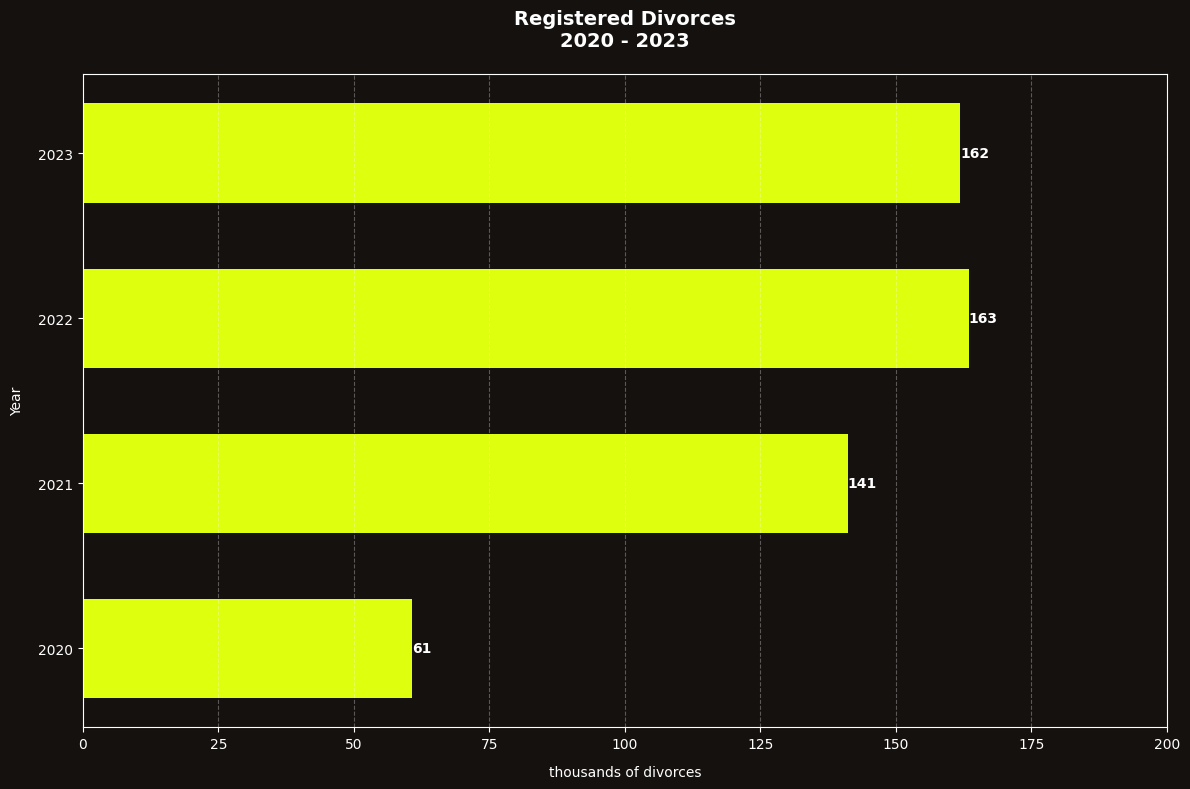

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Query para obtener los datos por año
sql_query = """
SELECT
    anio_eje as year,
    COUNT(*)/1000 as divorcios_miles  -- Dividimos por 1000 para mostrar miles
FROM table
WHERE anio_sen BETWEEN 2020 AND 2023
GROUP BY anio_eje
ORDER BY anio_eje
"""

df = spark.sql(sql_query).toPandas()

# Configurar el estilo para fondo oscuro
plt.style.use('dark_background')

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Establecer color de fondo
fig.patch.set_facecolor('#15110F')
ax.set_facecolor('#15110F')

# Crear las barras horizontales usando años enteros
years = [2020, 2021, 2022, 2023]  # Lista explícita de años
bars = ax.barh(years, df['divorcios_miles'],
               color='#DEFF0D',
               height=0.6)

# Añadir los valores al final de cada barra
for i, bar in enumerate(bars):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
            f'{df["divorcios_miles"][i]:.0f}',
            va='center',
            color='#FFF',
            fontsize=10,
            fontweight='bold')

# Personalizar el gráfico
ax.set_title('Registered Divorces\n2020 - 2023',
             pad=20,
             fontsize=14,
             fontweight='bold',
             color='#FFF')

# Etiquetas de los ejes
ax.set_xlabel('thousands of divorces', fontsize=10, labelpad=10, color='#FFF')
ax.set_ylabel('Year', fontsize=10, labelpad=10, color='#FFF')

# Personalizar los ejes
ax.grid(axis='x', linestyle='--', alpha=0.3, color='#FFF')
ax.set_xlim(0, 200)

# Configurar el rango de años en el eje Y
ax.set_yticks(years)
ax.set_yticklabels(years)

# Cambiar color de los ticks
ax.tick_params(colors='#FFF')

# Cambiar color de las líneas de los ejes
for spine in ax.spines.values():
    spine.set_color('#FFF')

# Ajustar márgenes
plt.margins(x=0.02)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [28]:
sql_result = spark.sql("""
-- 3. Diferencia de edad entre cónyuges
SELECT
    CASE
        WHEN ABS(edad_div1 - edad_div2) = 0 THEN 'Misma edad'
        WHEN ABS(edad_div1 - edad_div2) BETWEEN 1 AND 5 THEN '1-5 años'
        WHEN ABS(edad_div1 - edad_div2) BETWEEN 6 AND 10 THEN '6-10 años'
        WHEN ABS(edad_div1 - edad_div2) > 10 THEN 'Más de 10 años'
    END as diferencia_edad,
    COUNT(*) as cantidad,
    ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (), 2) as porcentaje,
    ROUND(AVG(dura_soc), 2) as duracion_promedio_matrimonio
FROM table
WHERE edad_div1 < 999 AND edad_div2 < 999
GROUP BY
    CASE
        WHEN ABS(edad_div1 - edad_div2) = 0 THEN 'Misma edad'
        WHEN ABS(edad_div1 - edad_div2) BETWEEN 1 AND 5 THEN '1-5 años'
        WHEN ABS(edad_div1 - edad_div2) BETWEEN 6 AND 10 THEN '6-10 años'
        WHEN ABS(edad_div1 - edad_div2) > 10 THEN 'Más de 10 años'
    END
ORDER BY
    CASE diferencia_edad
        WHEN 'Misma edad' THEN 1
        WHEN '1-5 años' THEN 2
        WHEN '6-10 años' THEN 3
        WHEN 'Más de 10 años' THEN 4
    END;
""")

sql_result.toPandas()

,diferencia_edad,cantidad,porcentaje,duracion_promedio_matrimonio
0,Misma edad,64355,13.80,21.72
1,1-5 años,287983,61.75,23.24
2,6-10 años,79299,17.00,23.92
3,Más de 10 años,34741,7.45,24.93


In [29]:
sql_result = spark.sql("""
-- 2. Estadísticas resumidas por género
SELECT
    'Primer cónyuge' as divorciante,
    ROUND(AVG(CASE WHEN sexo_div1 = 'Hombre' THEN edad_div1 END), 2) as edad_promedio_hombres,
    ROUND(MIN(CASE WHEN sexo_div1 = 'Hombre' THEN edad_div1 END), 2) as edad_minima_hombres,
    ROUND(MAX(CASE WHEN sexo_div1 = 'Hombre' THEN edad_div1 END), 2) as edad_maxima_hombres,
    ROUND(AVG(CASE WHEN sexo_div1 = 'Mujer' THEN edad_div1 END), 2) as edad_promedio_mujeres,
    ROUND(MIN(CASE WHEN sexo_div1 = 'Mujer' THEN edad_div1 END), 2) as edad_minima_mujeres,
    ROUND(MAX(CASE WHEN sexo_div1 = 'Mujer' THEN edad_div1 END), 2) as edad_maxima_mujeres
FROM table
WHERE edad_div1 < 999
UNION ALL
SELECT
    'Segundo cónyuge',
    ROUND(AVG(CASE WHEN sexo_div2 = 'Hombre' THEN edad_div2 END), 2),
    ROUND(MIN(CASE WHEN sexo_div2 = 'Hombre' THEN edad_div2 END), 2),
    ROUND(MAX(CASE WHEN sexo_div2 = 'Hombre' THEN edad_div2 END), 2),
    ROUND(AVG(CASE WHEN sexo_div2 = 'Mujer' THEN edad_div2 END), 2),
    ROUND(MIN(CASE WHEN sexo_div2 = 'Mujer' THEN edad_div2 END), 2),
    ROUND(MAX(CASE WHEN sexo_div2 = 'Mujer' THEN edad_div2 END), 2)
FROM table
WHERE edad_div2 < 999;
""")

sql_result.toPandas()

,divorciante,edad_promedio_hombres,edad_minima_hombres,edad_maxima_hombres,edad_promedio_mujeres,edad_minima_mujeres,edad_maxima_mujeres
0,Primer cónyuge,43.17,18,99,39.64,18,99
1,Segundo cónyuge,41.85,18,99,40.55,16,99


In [30]:
sql_result = spark.sql("""
-- 1. Distribución general de edades al divorciarse (por rangos)
SELECT
    CASE
        WHEN edad_mdiv1 < 20 THEN 'Menos de 20'
        WHEN edad_mdiv1 BETWEEN 20 AND 24 THEN '20-24'
        WHEN edad_mdiv1 BETWEEN 25 AND 29 THEN '25-29'
        WHEN edad_mdiv1 BETWEEN 30 AND 34 THEN '30-34'
        WHEN edad_mdiv1 BETWEEN 35 AND 39 THEN '35-39'
        WHEN edad_mdiv1 BETWEEN 40 AND 44 THEN '40-44'
        WHEN edad_mdiv1 BETWEEN 45 AND 49 THEN '45-49'
        WHEN edad_mdiv1 BETWEEN 50 AND 54 THEN '50-54'
        WHEN edad_mdiv1 BETWEEN 55 AND 59 THEN '55-59'
        WHEN edad_mdiv1 >= 60 THEN '60 o más'
    END as rango_edad,
    COUNT(*) as cantidad,
    ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (), 2) as porcentaje,
    ROUND(AVG(dura_soc), 2) as duracion_promedio_matrimonio
FROM table
WHERE edad_mdiv1 < 999  -- Excluir valores no válidos
GROUP BY
    CASE
        WHEN edad_mdiv1 < 20 THEN 'Menos de 20'
        WHEN edad_mdiv1 BETWEEN 20 AND 24 THEN '20-24'
        WHEN edad_mdiv1 BETWEEN 25 AND 29 THEN '25-29'
        WHEN edad_mdiv1 BETWEEN 30 AND 34 THEN '30-34'
        WHEN edad_mdiv1 BETWEEN 35 AND 39 THEN '35-39'
        WHEN edad_mdiv1 BETWEEN 40 AND 44 THEN '40-44'
        WHEN edad_mdiv1 BETWEEN 45 AND 49 THEN '45-49'
        WHEN edad_mdiv1 BETWEEN 50 AND 54 THEN '50-54'
        WHEN edad_mdiv1 BETWEEN 55 AND 59 THEN '55-59'
        WHEN edad_mdiv1 >= 60 THEN '60 o más'
    END
ORDER BY
    CASE rango_edad
        WHEN 'Menos de 20' THEN 1
        WHEN '20-24' THEN 2
        WHEN '25-29' THEN 3
        WHEN '30-34' THEN 4
        WHEN '35-39' THEN 5
        WHEN '40-44' THEN 6
        WHEN '45-49' THEN 7
        WHEN '50-54' THEN 8
        WHEN '55-59' THEN 9
        WHEN '60 o más' THEN 10
    END;
""")

sql_result.toPandas()

,rango_edad,cantidad,porcentaje,duracion_promedio_matrimonio
0,Menos de 20,92030,17.30,22.13
1,20-24,163039,30.64,20.43
2,25-29,103785,19.51,18.55
3,30-34,46498,8.74,18.24
4,35-39,21092,3.96,18.90
5,40-44,11263,2.12,20.47
6,45-49,6570,1.23,20.69
7,50-54,3878,0.73,22.17
8,55-59,2341,0.44,23.98
9,60 o más,81540,15.33,38.15


In [31]:
import pandas as pd
import plotly.express as px
import json
import requests
import numpy as np

def prepare_data(sql_result_df):
    # Mapeo de nombres de estados a códigos (mantener el mismo mapeo)
    state_codes = {
        'Ciudad de México': 'MX-CMX', 'Michoacán de Ocampo': 'MX-MIC',
        'Sinaloa': 'MX-SIN', 'Durango': 'MX-DUR', 'Guerrero': 'MX-GRO',
        'Chiapas': 'MX-CHP', 'Guanajuato': 'MX-GUA', 'Hidalgo': 'MX-HID',
        'Nayarit': 'MX-NAY', 'Coahuila de Zaragoza': 'MX-COA',
        'Chihuahua': 'MX-CHH', 'Morelos': 'MX-MOR',
        'Veracruz de Ignacio de la Llave': 'MX-VER', 'Yucatán': 'MX-YUC',
        'Colima': 'MX-COL', 'Campeche': 'MX-CAM', 'Tabasco': 'MX-TAB',
        'Oaxaca': 'MX-OAX', 'San Luis Potosí': 'MX-SLP',
        'Aguascalientes': 'MX-AGU', 'Baja California Sur': 'MX-BCS',
        'Puebla': 'MX-PUE', 'Nuevo León': 'MX-NLE', 'Tamaulipas': 'MX-TAM',
        'Zacatecas': 'MX-ZAC', 'Tlaxcala': 'MX-TLA', 'Querétaro': 'MX-QUE',
        'Jalisco': 'MX-JAL', 'Quintana Roo': 'MX-ROO', 'Sonora': 'MX-SON',
        'México': 'MX-MEX', 'Baja California': 'MX-BCN'
    }

    # Renombrar columnas y añadir códigos de estado
    df = sql_result_df.rename(columns={'ent_mat': 'estado', 'count(1)': 'divorcios'})
    df['id'] = df['estado'].map(state_codes)

    # Calcular rangos dinámicos basados en los cuartiles de los datos
    q1, q2, q3 = np.percentile(df['divorcios'], [25, 50, 75])

    # Categorizar los valores usando rangos dinámicos
    df['categoria'] = pd.cut(
        df['divorcios'],
        bins=[0, q1, q2, q3, float('inf')],
        labels=['Very Low', 'Low', 'Mid', 'High']
    )

    return df, [q1, q2, q3]

def create_interactive_map(df, year="2022", ranges=None):
    # Obtener el GeoJSON
    url = "https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json"
    geojson_data = requests.get(url).json()

    # Crear el mapa interactivo con escala de color dinámica
    fig = px.choropleth(
        df,
        geojson=geojson_data,
        locations='id',
        color='divorcios',
        hover_data={
            'estado': True,
            'categoria': True,
            'divorcios': ':,',
            'id': False
        },
        color_continuous_scale=[
            [0, 'rgba(255, 255, 255, 0.2)'],
            [0.25, 'rgba(222, 255, 13, 0.3)'],
            [0.5, 'rgba(222, 255, 13, 0.5)'],
            [0.75, 'rgba(222, 255, 13, 0.7)'],
            [1, 'rgba(222, 255, 13, 1.0)']
        ],
        featureidkey='properties.id',
        range_color=[df['divorcios'].min(), df['divorcios'].max()]
    )

    # Personalizar el diseño
    fig.update_geos(
        showcoastlines=True,
        coastlinecolor="rgba(255, 255, 255, 0.5)",
        showland=True,
        landcolor="#15110F",
        showcountries=True,
        countrycolor="rgba(255, 255, 255, 0.5)",
        showframe=False,
        projection_scale=2,
        center=dict(lat=24, lon=-102)
    )

    # Preparar los valores y textos para la barra de color
    if ranges:
        min_val = df['divorcios'].min()
        max_val = df['divorcios'].max()
        tickvals = [min_val] + ranges + [max_val]
        # Formatear los números con separadores de miles
        ticktext = [f'{int(val):,}' for val in tickvals]

    fig.update_layout(
        paper_bgcolor='#15110F',
        plot_bgcolor='#15110F',
        geo=dict(
            bgcolor='#15110F',
            lakecolor='#15110F',
        ),
        title=dict(
            text=f'Divorces per State {year}',
            font=dict(size=20, color='white', family='Arial Black'),
            x=0.5,
            y=0.95
        ),
        coloraxis_colorbar=dict(
            title='Number of<br>divorces',
            tickfont=dict(color='white', size=12),
            titlefont=dict(color='white', size=14),
            thickness=20,
            len=0.75,
            bgcolor='rgba(255, 255, 255, 0.1)',
            bordercolor='rgba(255, 255, 255, 0.2)',
            ticktext=ticktext if ranges else None,
            tickvals=tickvals if ranges else None,
            tickmode='array' if ranges else 'auto'
        ),
        hoverlabel=dict(
            bgcolor='rgba(50, 50, 50, 0.9)',
            font_size=14,
            font_color='white',
            bordercolor='rgba(255, 255, 255, 0.2)'
        ),
        margin=dict(l=0, r=0, t=50, b=0)
    )

    fig.update_traces(
        hovertemplate="<b>%{customdata[0]}</b><br>" +
                     "Categoría: %{customdata[1]}<br>" +
                     "Divorcios: %{customdata[2]}<extra></extra>"
    )

    return fig

# Para los datos de 2020
sql_result_df_2020 = spark.sql("SELECT ent_mat, COUNT(*) FROM table WHERE anio_eje = 2020 GROUP BY ent_mat").toPandas()
df_2020, ranges_2020 = prepare_data(sql_result_df_2020)
fig_2020 = create_interactive_map(df_2020, "2020", ranges_2020)
fig_2020.show()

In [32]:
# Para todos los datos
sql_result_df_all = spark.sql("SELECT ent_mat, COUNT(*) FROM table GROUP BY ent_mat").toPandas()
df_all, ranges_all = prepare_data(sql_result_df_all)
fig_all = create_interactive_map(df_all, "2020-2023", ranges_all)
fig_all.show()

In [33]:
# Para todos los datos
sql_result_df_all = spark.sql("SELECT ent_mat, COUNT(*) FROM table WHERE anio_eje = 2023 GROUP BY ent_mat").toPandas()
df_all, ranges_2023 = prepare_data(sql_result_df_all)
fig_all = create_interactive_map(df_all, "2023", ranges_2023)
fig_all.show()

In [34]:
resultado = spark.sql("""
    SELECT
        t_dvante,
        COUNT(*) as cantidad
    FROM table
    GROUP BY t_dvante
    ORDER BY cantidad DESC
""")

# Convertir a Pandas para visualización
df_resultado = resultado.toPandas()
df_resultado

,t_dvante,cantidad
0,Divorciantes hombre - mujer,530108
1,Divorciantes del mismo sexo mujeres,1202
2,Divorciantes del mismo sexo hombres,726


In [35]:
resultado = spark.sql("""
    SELECT
        t_dvante,
        COUNT(*) as cantidad
    FROM table
    WHERE t_dvante != 'Divorciantes hombre - mujer'
    GROUP BY t_dvante
    ORDER BY cantidad DESC
""")

# Convertir a Pandas para visualización
df_resultado = resultado.toPandas()
df_resultado

,t_dvante,cantidad
0,Divorciantes del mismo sexo mujeres,1202
1,Divorciantes del mismo sexo hombres,726


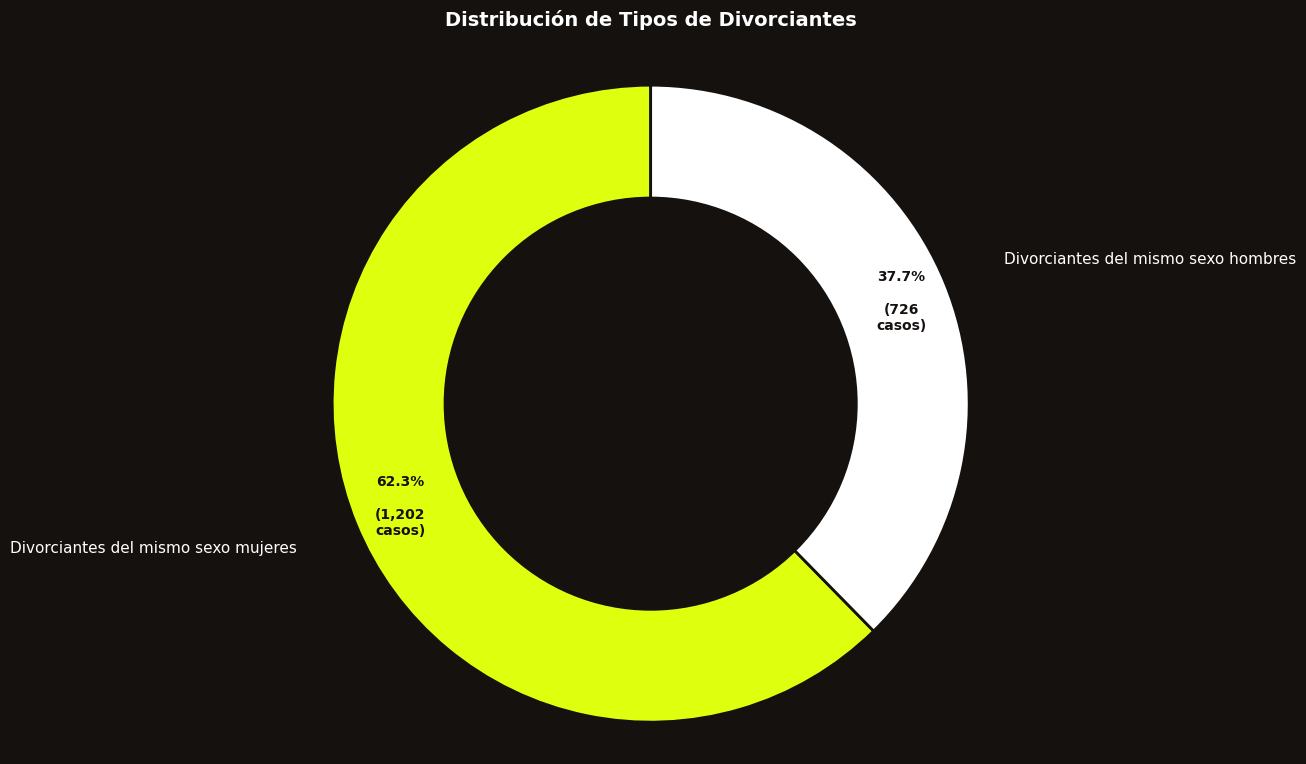

In [36]:
# Get data from Spark and convert to Pandas
resultado = spark.sql("""
    SELECT
        t_dvante,
        COUNT(*) as cantidad
    FROM table
    WHERE t_dvante != 'Divorciantes hombre - mujer'
    GROUP BY t_dvante
    ORDER BY cantidad DESC
""")

# Convert to Pandas for visualization
df_resultado = resultado.toPandas()

import matplotlib.pyplot as plt

# Configure style
plt.style.use('dark_background')

# Create figure with specific background
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('#15110F')
ax.set_facecolor('#15110F')

# Colors for the donut chart
colors = ['#DEFF0D', '#FFFFFF']

# Function to format both percentage and count with better spacing
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        # Add more spacing between lines and make text smaller
        return '{:.1f}%\n\n({:,}\ncasos)'.format(pct, val)
    return my_autopct

# Create donut chart with adjusted parameters
wedges, texts, autotexts = plt.pie(df_resultado['cantidad'],
                                  labels=df_resultado['t_dvante'],
                                  colors=colors,
                                  autopct=make_autopct(df_resultado['cantidad']),
                                  pctdistance=0.85,  # Move percentage labels even further out
                                  startangle=90,
                                  wedgeprops={'width': 0.5, 'edgecolor': '#15110F', 'linewidth': 2},
                                  labeldistance=1.2)  # Move category labels further out

# Customize labels and percentages - adjusted size
plt.setp(autotexts, size=10, weight="bold", color='#15110F')
plt.setp(texts, size=11, color='white')

# Add central circle with background color - slightly smaller to give more space
centre_circle = plt.Circle((0,0), 0.65, fc='#15110F')
fig.gca().add_artist(centre_circle)

# Adjust title
plt.title('Distribución de Tipos de Divorciantes',
          pad=20,
          color='white',
          size=14,
          weight='bold')

# Add more padding around the plot
plt.tight_layout(pad=2.0)

plt.axis('equal')
plt.show()

In [49]:
resultado = spark.sql("""
    SELECT
    t_dvante,
    COUNT(*) as cantidad
FROM table
WHERE t_dvante != 'Divorciantes hombre - mujer'
    AND anio_reg BETWEEN 2022 AND 2023
GROUP BY t_dvante
ORDER BY cantidad DESC;
""")
df_resultado = resultado.toPandas()
df_resultado

,t_dvante,cantidad
0,Divorciantes del mismo sexo mujeres,637
1,Divorciantes del mismo sexo hombres,387


In [50]:
resultado = spark.sql("""

SELECT
    mes_reg as mes,
    COUNT(*) as cantidad,
    ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (), 2) as porcentaje
FROM table
WHERE mes_reg IS NOT NULL
GROUP BY mes_reg
ORDER BY
    CASE
        WHEN mes_reg = 'Enero' THEN 1
        WHEN mes_reg = 'Febrero' THEN 2
        WHEN mes_reg = 'Marzo' THEN 3
        WHEN mes_reg = 'Abril' THEN 4
        WHEN mes_reg = 'Mayo' THEN 5
        WHEN mes_reg = 'Junio' THEN 6
        WHEN mes_reg = 'Julio' THEN 7
        WHEN mes_reg = 'Agosto' THEN 8
        WHEN mes_reg = 'Septiembre' THEN 9
        WHEN mes_reg = 'Octubre' THEN 10
        WHEN mes_reg = 'Noviembre' THEN 11
        WHEN mes_reg = 'Diciembre' THEN 12
    END;
    """)

# Convertir a Pandas para visualización
df_resultado = resultado.toPandas()
df_resultado

,mes,cantidad,porcentaje
0,No especificado,33942,6.38
1,Enero,45753,8.60
2,Febrero,48572,9.13
3,Marzo,51118,9.61
4,Abril,35326,6.64
5,Mayo,40887,7.69
6,Junio,45581,8.57
7,Julio,28744,5.40
8,Agosto,54258,10.20
9,Septiembre,44077,8.28


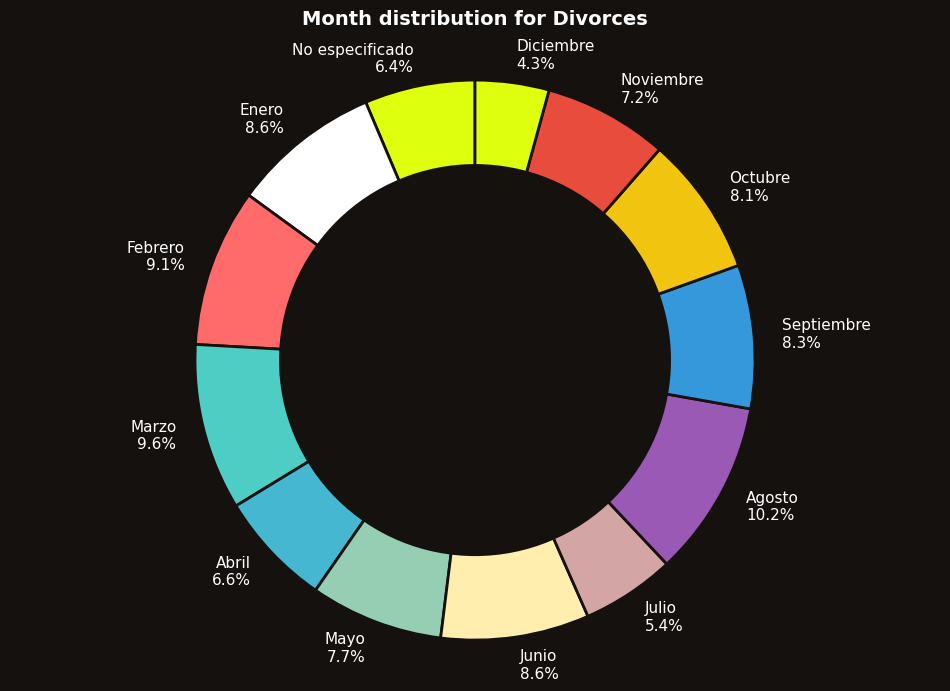

In [52]:
import matplotlib.pyplot as plt

# Asumiendo que el resultado está en un DataFrame llamado 'df_resultado'
# con columnas 'mes' y 'cantidad'

def format_label_with_pct(label, pct):
    return f'{label}\n{pct:.1f}%'

# Configurar el estilo
plt.style.use('dark_background')

# Crear la figura con el fondo específico
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('#15110F')
ax.set_facecolor('#15110F')

# Definir una paleta de colores para 12 meses
colors = ['#DEFF0D', '#FFFFFF', '#FF6B6B', '#4ECDC4', '#45B7D1',
          '#96CEB4', '#FFEEAD', '#D4A5A5', '#9B59B6', '#3498DB',
          '#F1C40F', '#E74C3C']

# Calcular los porcentajes
total = df_resultado['cantidad'].sum()
percentages = [value/total*100 for value in df_resultado['cantidad']]

# Crear las etiquetas con porcentajes
labels = [format_label_with_pct(mes, pct)
          for mes, pct in zip(df_resultado['mes'], percentages)]

# Crear la gráfica de dona
wedges, texts = plt.pie(df_resultado['cantidad'],
                       labels=labels,
                       colors=colors,
                       startangle=90,
                       wedgeprops={'width': 0.5, 'edgecolor': '#15110F', 'linewidth': 2},
                       labeldistance=1.1)  # Ajustar la distancia de las etiquetas

# Personalizar las etiquetas
plt.setp(texts, size=11, color='white')

# Agregar el círculo central del mismo color que el fondo
centre_circle = plt.Circle((0,0), 0.70, fc='#15110F')
fig.gca().add_artist(centre_circle)

# Ajustar el título
plt.title('Month distribution for Divorces',
          pad=20,
          color='white',
          size=14,
          weight='bold')

plt.axis('equal')
plt.show()

In [44]:
resultado = spark.sql("""
SELECT
    CASE
        WHEN custodia = 'No aplica' THEN 'No aplica'
        WHEN custodia = 'Divorciante 1' THEN 'Divorciante 1'
        WHEN custodia = 'Divorciante 2' THEN 'Divorciante 2'
        WHEN custodia = 'Ambos' THEN 'Ambos'
        WHEN custodia = 'Otro' THEN 'Otro'
        WHEN custodia = 'No especificado' THEN 'No especificado'
        WHEN custodia = 'No se otorga' THEN 'No se otorga'
    END as otorgamiento_custodia,
    COUNT(*) as cantidad_casos,
    ROUND(AVG(hij_men), 2) as promedio_hijos_menores
FROM table
WHERE hij_men > 0 AND hij_men < 98  -- Excluimos valores no válidos
GROUP BY custodia
ORDER BY cantidad_casos DESC;
    """)

# Convertir a Pandas para visualización
df_resultado = resultado.toPandas()
df_resultado

,otorgamiento_custodia,cantidad_casos,promedio_hijos_menores
0,Divorciante 1,104435,1.64
1,Divorciante 2,99247,1.64
2,Ambos,25913,1.76
3,Otro,552,1.76


In [46]:
resultado = spark.sql("""
WITH tiempo_proceso AS (
    SELECT
        CASE
            WHEN hij_men > 0 AND hij_men < 98 THEN 'Con menores'
            WHEN hij_men = 0 THEN 'Sin menores'
            ELSE 'No especificado'
        END as situacion_menores,
        -- Calculamos los días entre la demanda y la ejecutoria
        CASE mes_reg
            WHEN 'Enero' THEN 1
            WHEN 'Febrero' THEN 2
            WHEN 'Marzo' THEN 3
            WHEN 'Abril' THEN 4
            WHEN 'Mayo' THEN 5
            WHEN 'Junio' THEN 6
            WHEN 'Julio' THEN 7
            WHEN 'Agosto' THEN 8
            WHEN 'Septiembre' THEN 9
            WHEN 'Octubre' THEN 10
            WHEN 'Noviembre' THEN 11
            WHEN 'Diciembre' THEN 12
        END as mes_reg_num,
        CASE mes_eje
            WHEN 'Enero' THEN 1
            WHEN 'Febrero' THEN 2
            WHEN 'Marzo' THEN 3
            WHEN 'Abril' THEN 4
            WHEN 'Mayo' THEN 5
            WHEN 'Junio' THEN 6
            WHEN 'Julio' THEN 7
            WHEN 'Agosto' THEN 8
            WHEN 'Septiembre' THEN 9
            WHEN 'Octubre' THEN 10
            WHEN 'Noviembre' THEN 11
            WHEN 'Diciembre' THEN 12
        END as mes_eje_num,
        (anio_eje * 365 + mes_eje_num * 30 + dia_eje) -
        (anio_reg * 365 + mes_reg_num * 30 + dia_reg) as dias_proceso
    FROM table
    WHERE
        mes_reg IS NOT NULL AND
        mes_eje IS NOT NULL AND
        anio_reg > 1950 AND anio_reg < 2024 AND
        anio_eje > 1950 AND anio_eje < 2024 AND
        dia_reg BETWEEN 1 AND 31 AND
        dia_eje BETWEEN 1 AND 31
)
SELECT
    situacion_menores,
    COUNT(*) as cantidad_casos,
    ROUND(AVG(dias_proceso), 2) as promedio_dias_proceso,
    ROUND(MIN(dias_proceso), 2) as min_dias_proceso,
    ROUND(MAX(dias_proceso), 2) as max_dias_proceso
FROM tiempo_proceso
WHERE dias_proceso >= 0
GROUP BY situacion_menores
ORDER BY cantidad_casos DESC;
    """)

# Convertir a Pandas para visualización
df_resultado = resultado.toPandas()
df_resultado

,situacion_menores,cantidad_casos,promedio_dias_proceso,min_dias_proceso,max_dias_proceso
0,Sin menores,243003,173.18,0,21539
1,Con menores,230081,184.95,0,17744
2,No especificado,24933,36.16,0,12055


In [40]:
resultado = spark.sql("""

SELECT
    mes_reg as mes,
    COUNT(*) as cantidad,
    ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (), 2) as porcentaje
FROM table
WHERE mes_reg IS NOT NULL
GROUP BY mes_reg
ORDER BY
    CASE
        WHEN mes_reg = 'Enero' THEN 1
        WHEN mes_reg = 'Febrero' THEN 2
        WHEN mes_reg = 'Marzo' THEN 3
        WHEN mes_reg = 'Abril' THEN 4
        WHEN mes_reg = 'Mayo' THEN 5
        WHEN mes_reg = 'Junio' THEN 6
        WHEN mes_reg = 'Julio' THEN 7
        WHEN mes_reg = 'Agosto' THEN 8
        WHEN mes_reg = 'Septiembre' THEN 9
        WHEN mes_reg = 'Octubre' THEN 10
        WHEN mes_reg = 'Noviembre' THEN 11
        WHEN mes_reg = 'Diciembre' THEN 12
    END;
    """)

# Convertir a Pandas para visualización
df_resultado = resultado.toPandas()
df_resultado

,mes,cantidad,porcentaje
0,No especificado,33942,6.38
1,Enero,45753,8.60
2,Febrero,48572,9.13
3,Marzo,51118,9.61
4,Abril,35326,6.64
5,Mayo,40887,7.69
6,Junio,45581,8.57
7,Julio,28744,5.40
8,Agosto,54258,10.20
9,Septiembre,44077,8.28
